# this is a example about some activation functions
	ReLU


	Swish

	
	GELU

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [53]:
x = torch.randn(4, 10)

In [54]:
x

tensor([[-1.7984,  0.2495,  0.0768,  0.1207,  1.3964, -0.8810,  0.4881,  0.5125,
         -1.2625, -1.2611],
        [ 0.6296,  0.3517,  1.1806, -1.6212, -0.4063, -0.8527, -1.6281, -1.9404,
         -0.8708, -1.3223],
        [ 1.1498,  0.8098,  1.3159, -1.0357, -0.1492,  1.2362, -1.1827,  0.9946,
         -0.1088, -0.7902],
        [-0.1508,  1.9786,  0.2166,  0.2463,  0.3807, -1.1332,  1.0462, -0.2480,
         -0.4784, -1.0036]])

In [61]:
# === 1. ReLU ===
class ReLUModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        return self.fc2(x)

In [62]:
# === 2. Swish ===
class SwishModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1)
      
    def Swish(self, x):
        return x * torch.sigmoid(x)
    
    def forward(self, x):
        x = self.Swish(self.fc1(x))
        return self.fc2(x) 

In [63]:
# === 3. GELU ===

class GELUModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1)
        
        
    def forward(self, x):
        x = F.gelu(self.fc1(x))
        return self.fc2(x)
    

In [64]:
models = {
	'ReLU': ReLUModel(),
	'Swish': SwishModel(),
	'GELU': GELUModel()
 
}

In [65]:
out_puts = {}

In [66]:
for name, model in models.items():
    out = model(x).detach().squeeze()
    out_puts[name] = out

In [68]:
import matplotlib.pyplot as plt

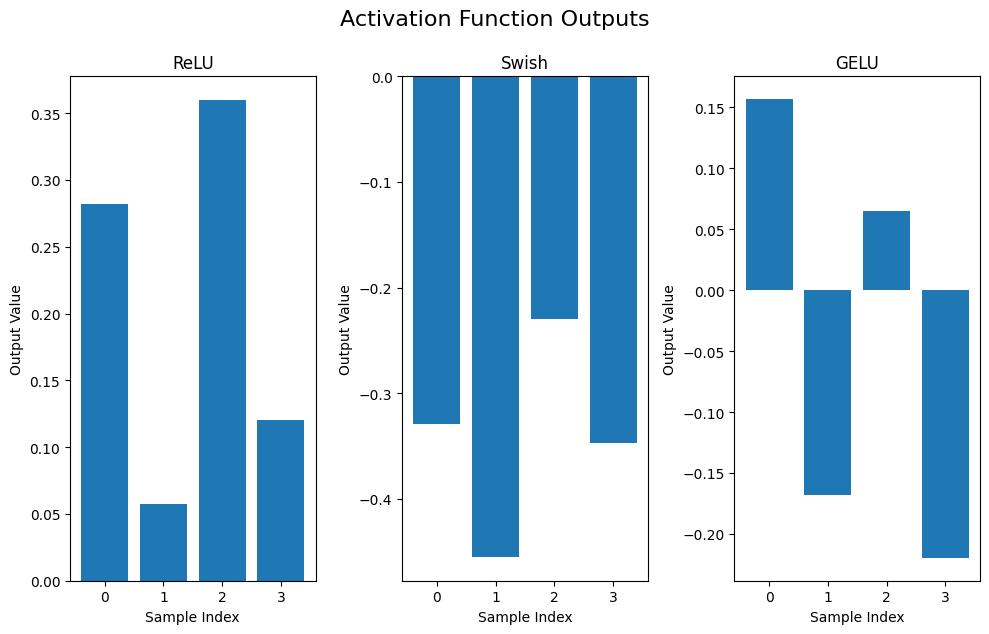

In [69]:
plt.figure(figsize=(10,6))
for i, (name, out) in enumerate(out_puts.items()):
    plt.subplot(1, 3, i+1)
    plt.bar(range(len(out)), out.numpy())
    plt.title(name)
    plt.xlabel("Sample Index")
    plt.ylabel("Output Value")

plt.tight_layout()
plt.suptitle("Activation Function Outputs", y=1.05, fontsize=16)
plt.show()
